In [1]:
import numpy as np
import pandas as pd
import os
import io
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

### Stop words 
https://www.geeksforgeeks.org/removing-stop-words-nltk-python/ <br>
NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages.

In [2]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

###  Initialising a empty dictonary

In [3]:
 dic={}

### this function gets input of a file and breaks it into line and words
we traverse through each word in words list and check <br>
1. if it is not a stop word after converting it into lower as our stop words list contains everything om lower case
2. check if it is an alphabet only
3. we create a dictonry with non stop_words by storing the word as key and its freq as the value

In [4]:
def ReadFile(file) :
    line = file.read()
    words = line.split()
    c=0
    for r in words:
        if not r.lower() in stop_words and r.isalpha():
            if(r in dic) :
                prev_freq = dic.get(r)
                prev_freq+=1
                dic[r] = prev_freq
            else :
                dic[r]=1

### File handling
fetching the folders and then openingeach file in sub folders and sending it to ReadFile function

In [5]:
groups = os.scandir('20_newsgroups/')
for group in groups :
    documents = os.scandir(group)
    for doc in documents :
        file = open(doc,'r')
        ReadFile(file)

### Sorting the dictonary in desending order

In [6]:
sorted_dic = {k: v for k, v in sorted(dic.items(), key=lambda item:item[1],reverse=True)}
sorted_dic

{'Apr': 19568,
 'GMT': 17684,
 'would': 15022,
 'article': 11968,
 'one': 11417,
 'like': 9091,
 'get': 8061,
 'University': 8048,
 'people': 8009,
 'know': 7591,
 'think': 7052,
 'use': 6019,
 'X': 5856,
 'also': 5704,
 'could': 5350,
 'even': 4732,
 'may': 4705,
 'make': 4674,
 'good': 4656,
 'see': 4372,
 'much': 4372,
 'many': 4281,
 'two': 4184,
 'time': 4175,
 'want': 3999,
 'say': 3978,
 'way': 3677,
 'used': 3653,
 'new': 3632,
 'need': 3594,
 'first': 3548,
 'anyone': 3491,
 'really': 3348,
 'believe': 3264,
 'going': 3170,
 'still': 3156,
 'something': 3082,
 'find': 3080,
 'right': 3064,
 'might': 3049,
 'said': 3037,
 'world': 3014,
 'take': 2923,
 'go': 2905,
 'using': 2832,
 'must': 2727,
 'back': 2690,
 'never': 2667,
 'since': 2636,
 'us': 2625,
 'work': 2607,
 'got': 2585,
 'without': 2578,
 'last': 2558,
 'made': 2489,
 'God': 2466,
 'system': 2457,
 'better': 2442,
 'someone': 2426,
 'problem': 2398,
 'May': 2365,
 'New': 2351,
 'well': 2340,
 'read': 2301,
 'things'

### Picking top words from sorted dic 

In [7]:
reduced_dic = {}
i=1
for key in sorted_dic :
    reduced_dic[key] = sorted_dic[key]
    i+=1
    if(i>15000) :
        break;
len(reduced_dic.items())

15000

###  just renaming not fot TA
here i have kept the bakcup of sorted dic and since the code belo is wriiten on sorted_doc and i have to use reduced_dic with less size so i chnaged the name of reduceed-dic to sorted_dic

In [8]:
sorted_dic_bakcup = sorted_dic
sorted_dic = reduced_dic
len(sorted_dic)

15000

### Creating a list to plot graph which has the position of each word in dictonary
word_pos_dic stores the key as words and value is the index at which that word is stored in the final 2d array like <br>
we have to create the features as all the words so i have given a index to each word that index i stored in this dic

In [9]:
import seaborn as sns
word_pos_dic = {}
i=0
for key in sorted_dic.keys() :
    word_pos_dic[key] = i
    i+=1
word_pos_dic

{'Apr': 0,
 'GMT': 1,
 'would': 2,
 'article': 3,
 'one': 4,
 'like': 5,
 'get': 6,
 'University': 7,
 'people': 8,
 'know': 9,
 'think': 10,
 'use': 11,
 'X': 12,
 'also': 13,
 'could': 14,
 'even': 15,
 'may': 16,
 'make': 17,
 'good': 18,
 'see': 19,
 'much': 20,
 'many': 21,
 'two': 22,
 'time': 23,
 'want': 24,
 'say': 25,
 'way': 26,
 'used': 27,
 'new': 28,
 'need': 29,
 'first': 30,
 'anyone': 31,
 'really': 32,
 'believe': 33,
 'going': 34,
 'still': 35,
 'something': 36,
 'find': 37,
 'right': 38,
 'might': 39,
 'said': 40,
 'world': 41,
 'take': 42,
 'go': 43,
 'using': 44,
 'must': 45,
 'back': 46,
 'never': 47,
 'since': 48,
 'us': 49,
 'work': 50,
 'got': 51,
 'without': 52,
 'last': 53,
 'made': 54,
 'God': 55,
 'system': 56,
 'better': 57,
 'someone': 58,
 'problem': 59,
 'May': 60,
 'New': 61,
 'well': 62,
 'read': 63,
 'things': 64,
 'sure': 65,
 'come': 66,
 'number': 67,
 'point': 68,
 'little': 69,
 'Computer': 70,
 'government': 71,
 'give': 72,
 'part': 73,
 'ano

### Adding quotes
since in the word_pos_dic keys are stored with single quotes <br>
this functions takes a word as input and add quotes to it <br>
for example <br>
for input sarthak <br>
output will be 'sarthak'

In [10]:
def add_single_quotes(s1):
    return '{}'.format(s1)

### Plotting the graph between the freq count and pos of the word in the dictonay

<AxesSubplot:>

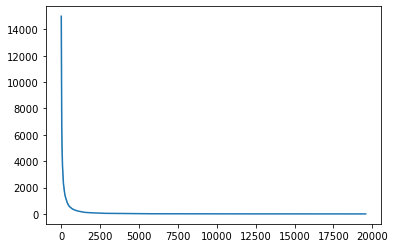

In [11]:
sns.lineplot(y=word_pos_dic.values(),x=list(sorted_dic.values()))

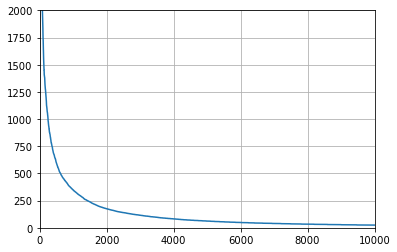

In [12]:
import matplotlib.pyplot as plt
plt.plot(word_pos_dic.values(), list(sorted_dic.values()))
plt.grid()
plt.ylim([0,2000])
plt.xlim([0, 10000])
plt.show()

# -------------------------------Creating 2d list--------------------------------------

### Initialising a  l of  rows as total files in all groups and column size equal to the dic of words or vocabs 
https://www.geeksforgeeks.org/python-using-2d-arrays-lists-the-right-way/

In [13]:
x=[]

### this function takes a file and the index of the file to which it belongs and it creates an 1d array of size equal to number of words which is then returned
we create this array of each and every file and retrurn this which is then added to the list x below

In [14]:
def AddInto2DArray(file,i) :
    line = file.read()
    words = line.split()
    array_for_1_file = [0]*len(sorted_dic.keys())
    for word in words:
        if word in sorted_dic :
            #word = goverment
            index = add_single_quotes(word)
            #index = 'Goverment'
            #arr[i][word_pos_dic[index]]= arr[i][word_pos_dic[index]] + 1
            array_for_1_file[word_pos_dic[index]]+=1
            
    return array_for_1_file
            
            

    

### file handling and sending the group id along with file
sending the files to AddInto2dArray and each time a file is sent the <br> 
group to which it belongs to is added into a list of y

In [15]:
groups = os.scandir('20_newsgroups/')
k=0
y=[]
for group in groups :
    documents = os.scandir(group)
    for files in documents :
        array_for_1_file = []
        file = open(files,'r')
        y.append(os.path.basename(group))
        array_for_1_file = AddInto2DArray(file,k)
        x.append(array_for_1_file)
        k=k+1

        
    

In [16]:
print(np.shape(x))
y_shaped = np.array(y).reshape(-1,1)
np.shape(y_shaped)

(19997, 15000)


(19997, 1)

### my y contained data like [['sports],[politics],[education],............]
which should be like  [sports,politics,eduction,...........]

In [17]:
y_f = []
for y in y_shaped :
    y_f.append(y[0])
    
y_f_reshaped = np.array(y_f).reshape(-1,1)
print(np.shape(y_f_reshaped))
print(np.shape(y_f))

(19997, 1)
(19997,)


### Splitting the data

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y_f,random_state = 0)

###  Using inbuilt classifier to predict the output

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
print(np.shape(ytrain))
print(np.shape(xtrain))
print(type(xtrain))


(14997,)
(14997, 15000)
<class 'list'>


### confusion_matrix for inbult classifier

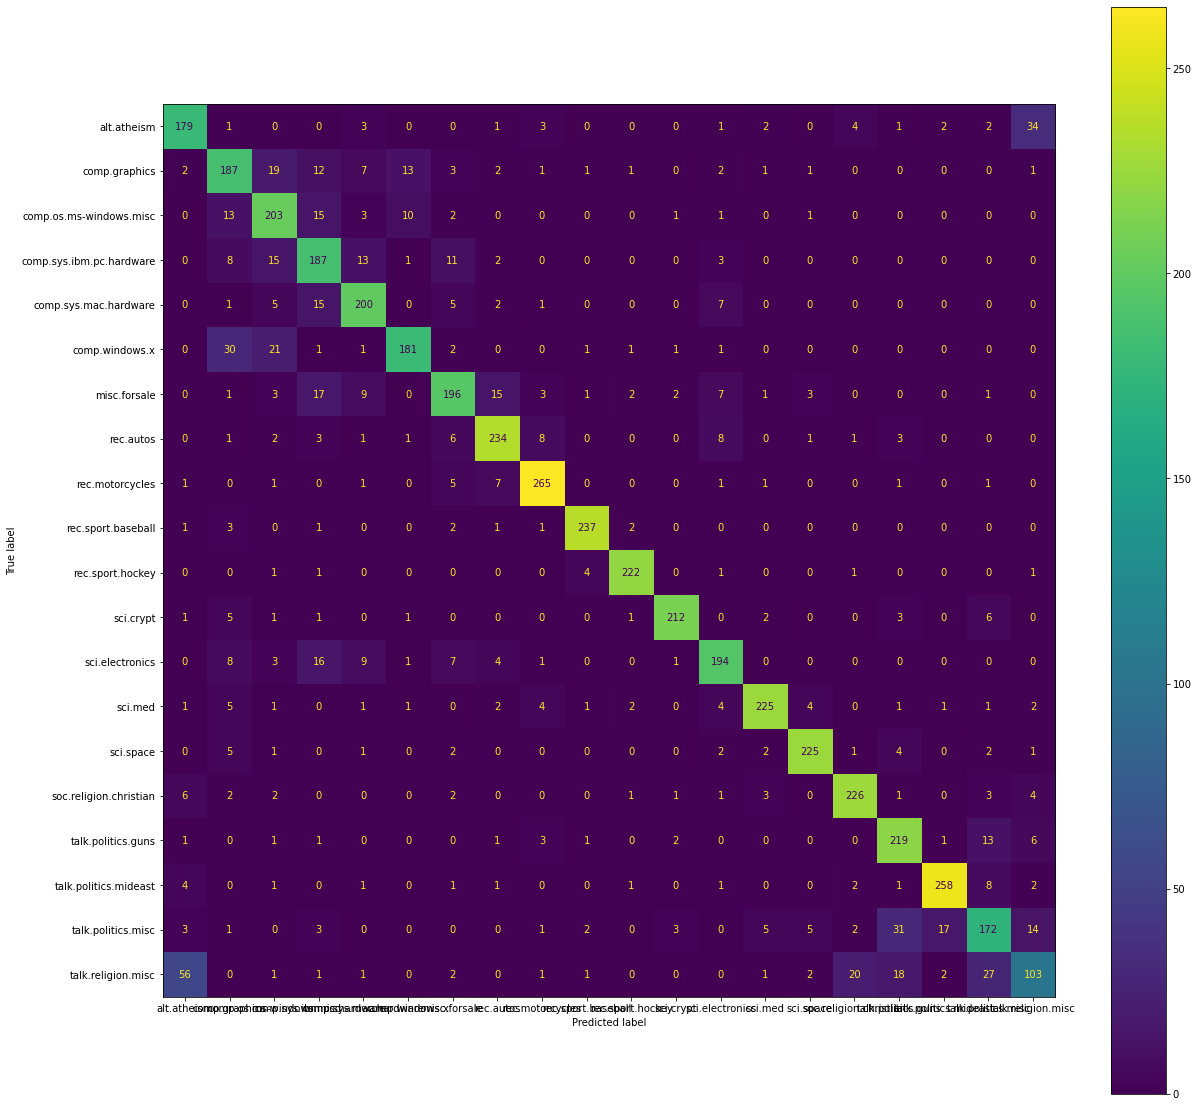

In [20]:
from sklearn.metrics import plot_confusion_matrix
fig,ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(clf, xtest, ytest,ax=ax)  
plt.show()  

In [21]:
print(confusion_matrix(ytest, ypred))

[[179   1   0   0   3   0   0   1   3   0   0   0   1   2   0   4   1   2
    2  34]
 [  2 187  19  12   7  13   3   2   1   1   1   0   2   1   1   0   0   0
    0   1]
 [  0  13 203  15   3  10   2   0   0   0   0   1   1   0   1   0   0   0
    0   0]
 [  0   8  15 187  13   1  11   2   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   1   5  15 200   0   5   2   1   0   0   0   7   0   0   0   0   0
    0   0]
 [  0  30  21   1   1 181   2   0   0   1   1   1   1   0   0   0   0   0
    0   0]
 [  0   1   3  17   9   0 196  15   3   1   2   2   7   1   3   0   0   0
    1   0]
 [  0   1   2   3   1   1   6 234   8   0   0   0   8   0   1   1   3   0
    0   0]
 [  1   0   1   0   1   0   5   7 265   0   0   0   1   1   0   0   1   0
    1   0]
 [  1   3   0   1   0   0   2   1   1 237   2   0   0   0   0   0   0   0
    0   0]
 [  0   0   1   1   0   0   0   0   0   4 222   0   1   0   0   1   0   0
    0   1]
 [  1   5   1   1   0   1   0   0   0   0   1 212   0   2   0   0

In [22]:
print(classification_report(ytest, ypred))

                          precision    recall  f1-score   support

             alt.atheism       0.70      0.77      0.73       233
           comp.graphics       0.69      0.74      0.71       253
 comp.os.ms-windows.misc       0.72      0.82      0.77       249
comp.sys.ibm.pc.hardware       0.68      0.78      0.73       240
   comp.sys.mac.hardware       0.80      0.85      0.82       236
          comp.windows.x       0.87      0.75      0.81       240
            misc.forsale       0.80      0.75      0.77       261
               rec.autos       0.86      0.87      0.87       269
         rec.motorcycles       0.91      0.93      0.92       284
      rec.sport.baseball       0.95      0.96      0.95       248
        rec.sport.hockey       0.95      0.96      0.96       231
               sci.crypt       0.95      0.91      0.93       233
         sci.electronics       0.83      0.80      0.81       244
                 sci.med       0.93      0.88      0.90       256
         

### ------------------------- Implementing my own multinomial naive bayes ------------------------------

### fit function
We need to calculate log( P(X=x | y=current_class) ) + log( P(y=current_class) ) <br>

Assuming independent events: P(X=x | y=current_class) = P(w1|y=current_class) P(w2|y=current_class) P(w3|y=current_class) * .... <br>

Therefore, log( P(X=x | y=current_class) ) = log( P(w1|y=current_class) ) + log( P(w2|y=current_class) ) + log( P(w3|y=current_class) ) + . . . <br>

In [23]:
def fit(xtrain,ytrain):
    dic ={}
    vocab_size = 0  # total number of words present in Vocab
    xtrain = np.array(xtrain)
    dic["total_doc"] = len(ytrain)
    for curr_class in set(ytrain) :
        dic[curr_class] ={}    
        # current_class_rows will have a boolean array with true when the particular row belongs to that classs
        current_class_rows = (ytrain==curr_class)
        # xtrain_for_curr_class has only those xtrain for a particular class
        xtrain_for_curr_class = xtrain[current_class_rows]
        ytrain_for_curr_class = ytrain[current_class_rows]
        # this stroes the length of that class ki total setosa kitna baaki kitne
        dic[curr_class]["total_count_of_each_class"] = len(ytrain_for_curr_class)

        # har class ke liye saare words se traverse kro
        total_curr_class_words = 0
        for j in range(xtrain.shape[1]):
            dic[curr_class][j] = xtrain_for_curr_class[:, j].sum()
            total_curr_class_words += xtrain_for_curr_class[:, j-1].sum()
        
        dic[curr_class]["total_count"] = total_curr_class_words
        vocab_size += total_curr_class_words
    dic["vocab_size"] = vocab_size
              
    return dic

In [24]:
def getProb(dic, x, current_class):
    #  log( P(y=current_class) )
    output = np.log(dic[current_class]['total_count_of_each_class']) - np.log(dic["total_doc"]) 
    
    num_features = len(dic[current_class].keys()) - 2  # -2 bcz 2 keys are total_count and current_class_count
    for j in range(num_features):
        xj = x[j]
        if xj == 0: # word not in test data document
            continue
            
        count_jth_word_in_current_class = dic[current_class][j] + 1  # +1 bcz of laplace correction
        count_current_class = dic[current_class]["total_count"] + dic["vocab_size"]
        count_xj_probability = np.log(count_jth_word_in_current_class) - np.log(count_current_class)
        output = output + count_xj_probability
    
    return output

In [25]:
def PredictForOne(dic,x):
    classes = dic.keys()
    # highest_prob stores like there is 33% chance that x belongs to class 0 and 40% chance that it belongs to class 1
    # and 80% chance that it belongs to class 2 so highest_prob will store 80
    highest_prob = -1000
    predicted_class = -123
    for curr_class in classes :
        if(curr_class =="total_doc" or curr_class=="vocab_size") :
            continue
        p_that_x_belongs_to_curr_class = getProb(dic,x,curr_class)
        if(p_that_x_belongs_to_curr_class>highest_prob) :
            highest_prob = p_that_x_belongs_to_curr_class
            predicted_class = curr_class
            
    return predicted_class

In [26]:
def predict(dic,xtest) :
    ypred=[]
    for x in xtest:
        x_class = PredictForOne(dic,x)
        ypred.append(x_class)  
    return ypred

### DELETE

In [202]:
dic = fit(xtrain,ytrain)
#ypred_own = predict(dic,xtest)
print(np.shape(ypred_own))
print(np.shape(ypred))
print(np.shape(ytest))

KeyboardInterrupt: 

In [28]:
print(classification_report(ytest, ypred))

                          precision    recall  f1-score   support

             alt.atheism       0.70      0.77      0.73       233
           comp.graphics       0.69      0.74      0.71       253
 comp.os.ms-windows.misc       0.72      0.82      0.77       249
comp.sys.ibm.pc.hardware       0.68      0.78      0.73       240
   comp.sys.mac.hardware       0.80      0.85      0.82       236
          comp.windows.x       0.87      0.75      0.81       240
            misc.forsale       0.80      0.75      0.77       261
               rec.autos       0.86      0.87      0.87       269
         rec.motorcycles       0.91      0.93      0.92       284
      rec.sport.baseball       0.95      0.96      0.95       248
        rec.sport.hockey       0.95      0.96      0.96       231
               sci.crypt       0.95      0.91      0.93       233
         sci.electronics       0.83      0.80      0.81       244
                 sci.med       0.93      0.88      0.90       256
         

In [29]:
print(confusion_matrix(ytest, ypred))

[[179   1   0   0   3   0   0   1   3   0   0   0   1   2   0   4   1   2
    2  34]
 [  2 187  19  12   7  13   3   2   1   1   1   0   2   1   1   0   0   0
    0   1]
 [  0  13 203  15   3  10   2   0   0   0   0   1   1   0   1   0   0   0
    0   0]
 [  0   8  15 187  13   1  11   2   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   1   5  15 200   0   5   2   1   0   0   0   7   0   0   0   0   0
    0   0]
 [  0  30  21   1   1 181   2   0   0   1   1   1   1   0   0   0   0   0
    0   0]
 [  0   1   3  17   9   0 196  15   3   1   2   2   7   1   3   0   0   0
    1   0]
 [  0   1   2   3   1   1   6 234   8   0   0   0   8   0   1   1   3   0
    0   0]
 [  1   0   1   0   1   0   5   7 265   0   0   0   1   1   0   0   1   0
    1   0]
 [  1   3   0   1   0   0   2   1   1 237   2   0   0   0   0   0   0   0
    0   0]
 [  0   0   1   1   0   0   0   0   0   4 222   0   1   0   0   1   0   0
    0   1]
 [  1   5   1   1   0   1   0   0   0   0   1 212   0   2   0   0

# -------------------------------- FUN CODE --------------------------------------------

### Sentence Prediction

In [207]:
def sentence_prediction(sentence) :
    sent_pred_arr = np.zeros((5000,15000),dtype=int)
    for word in sentence.split(" ") :
        if(add_single_quotes(word) not in stop_words and add_single_quotes(word) in sorted_dic) :
            sent_pred_arr[0][word_pos_dic[add_single_quotes(word)]]=1
    testing_predict_for_oneline = clf.predict(sent_pred_arr)
    return testing_predict_for_oneline[0]

## USER INTERFACE

In [210]:
from tkinter import *
from tkinter import filedialog,messagebox
import webbrowser

window = Tk()
window.title("Text classification")
entryText = StringVar()

def btnClicked():
    sentence = question_input.get()
    if question_input == "":
        messagebox.showerror(title="Empty Fields", message="Please enter Token")
    else:
        output_predicted = sentence_prediction(sentence)
        entryText.set(output_predicted)
        

def github_clicked(event):
    url = "https://github.com/Sarthak-Sethi/Text-Classification"
    webbrowser.open_new(url)

window.geometry("862x519")
window.configure(bg="#3A7FF6")
canvas = Canvas(window,bg="#3A7FF6",height=519,width=862,bd=0, highlightthickness=0,relief="ridge")
canvas.place(x=0,y=0)
canvas.create_rectangle(431, 0, 431 + 431, 0 + 519, fill="#FCFCFC",outline="")
canvas.create_rectangle(40, 160, 40 + 60, 160 + 5, fill="#FCFCFC",outline="")

text_box_bg = PhotoImage(file=f"gndulogo.png",width=400)
#token_entry_img = canvas.create_image(180.5,80.5,image=text_box_bg)

question_input = Entry(bd=0,bg="#F6F7F9",highlightthickness=0)
question_input.place(x=490.0,y=137+25,width=321.0,height=35)




canvas.create_text(650.0,100.0,text=" Enter your Sentence",fill="#515486",font=("Salsa",int(23.0)))

title = Label(text="  SIX MONTHS \n INDUSTRIAL TRAINING\n PROJECT", bg="#3A7FF6",fg="white",font=("Arial-BoldMT",int(20.0)))
title.place(x=27.0,y=150.0)

info_text = Label(text="TEXT CLASSIFICATION\n                  USING\n          NAIVE BAYES",bg="#3A7FF6",fg="white",justify="left",font=("Georgia",int(16.0)))
info_text.place(x=77.0,y=300.0)

github = Label(text="github Repository", bg="#3A7FF6",fg="white", cursor="hand2")
github.place(x=27,y=450)
github.bind('<Button-1>', github_clicked)

predict_btn_img = PhotoImage(file="btn.png")
predict_btn = Button(image=predict_btn_img, command=btnClicked, relief="flat")
predict_btn.place(x=530, y=251)

output = Entry(bd=5,bg="#3A7FF6",highlightthickness=0,textvariable=entryText,font=("Calibri 18"))
output.place(x=530.0,y=400,width=251.0,height=70)


window.resizable(False, False)
window.mainloop()
